<b><h1>Life, Liberty, and the Pursuit of Freedom from Credit Card Fraud
<h4>by Saul Gonzalez

<h2>The Goal:

Predict credit card fraud while incorporating unsupervised machine learning learning techniques that can consistently and accurately detect potentially fraudulent transactions on unseen data.

<h2>Initial Questions:

1. Are any of the features correlated? 

2. Does <b>device_os</b> show a liability for credit card fraud due to the percentage of fraud attributed to they type of device_os?

3. Does <b>zip_count_4w</b> show a trend of credit card fraud attributed to specific locations?

4. Classification or regression? Should I do both for a comparison given the time I have to work on this?

5. Are all input variables relevant? Which ones are <b>MOST</b> relevant? 

<h2>Project Outline:

1. Data Acquisition:
- Acquire the data from: https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022
2. Data Preparation:
- Investigate the column data types
- Investigate & handle missing values if required
- Investigate & handle outliers if required
3. Data Exploration:
- Analyze the Uni/Bi/Multivariate variables to see how features interact.
- Conduct hypothesis testing
- Correlation testing
4. Modeling:
- Conduct testing through various regression models to determine the best choice for predicting fraud on unseen data
5. Presentation:
- 5 minute storytelling presentation based on drivers of credit card fraud

<h2>Imports

In [1]:
import wrangle as wr
import explore as ex
import modeling as ml
from matplotlib import patches

import numpy as np
import pandas as pd
from scipy import stats 

import matplotlib.pyplot as plt
import seaborn as sns

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

<h2>Acquire:
 <h4> Data was imported from the Kaggle Bank Account Fraud Dataset Suite link and converted into a single dataframe.

In [2]:
df = pd.read_csv('Base.csv')
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


<h2>Data Preparation:</h2>

<h3>Steps taken to clean the data:</h3>

- Remove outliers.
- Split the data into Train, Validate, & Test data sets.

In [3]:
#Remove Outliers
df = wr.remove_outliers(df, 4)

In [4]:
#Split the Data
train, validate, test = wr.split_data(df)


    train -> (399820, 32)
    validate -> (171352, 32)
    test -> (142794, 32)


<h2>Explore:</h2>
    
- Explore the Uni/Bi/Multivariate variables
- Explore feature correlation and conduct hypothesis tests
- Summarize key features and takeaways


<b>What were the top features that showed correlation to the target 'fraud_bool', per my heatmap during multi-variate exploration?

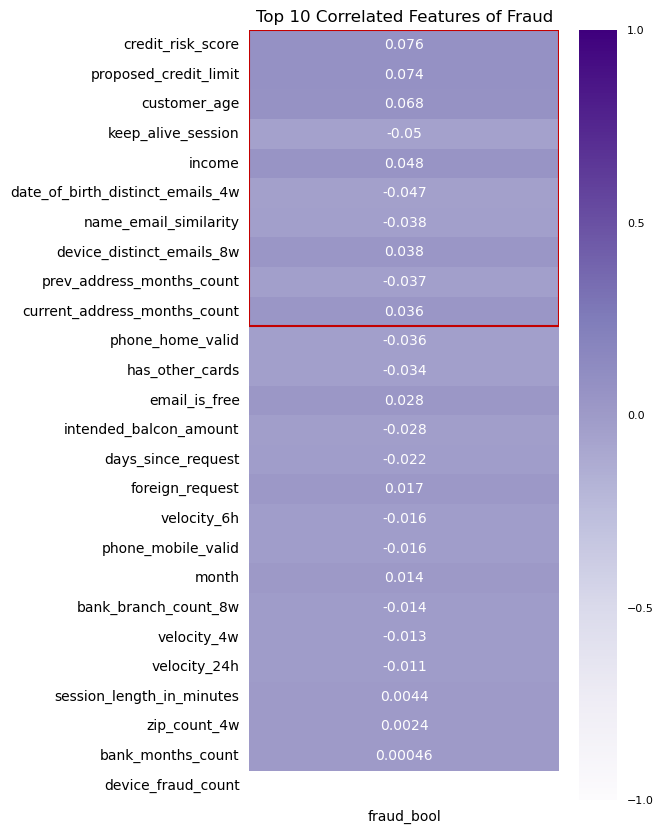

In [5]:
ex.heatmap_ranked(train)

<b><h2>From the Uni/Bi/Multivariariate Exploration & the Heatmap, I cultivated various hypothesis and conducted statistical testing below.

<h3>Is there a relationship between <b>Proposed Credit Limit</b> and <b>Customer Age</b>?

𝐻0
 : There is no linear correlation between Proposed Credit Limit and Customer Age.

𝐻𝑎
 : There is a linear correlation between Proposed Credit Limit and Customer Age.

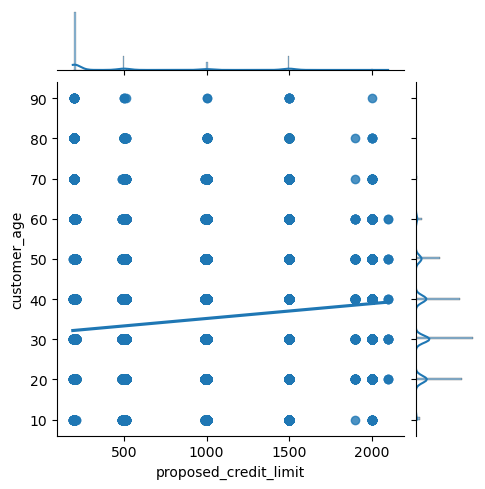

In [6]:
sns.jointplot(x="proposed_credit_limit", y="customer_age", data=train,  kind='reg', height=5)
plt.show()

Statistical Testing: These two variables are Continuous vs Continuous, <b>both</b> not normally distributed per the shapiro test.

The Spearman's R was used for a nonparametric test of linearity.

In [7]:
r, p = stats.spearmanr(train.proposed_credit_limit, train.customer_age)
ex.eval_Spearman(r, p, α=0.05)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.155681
P-value: 0.0


> The visualization appears to mirror the stats test showing that there is a relationship between the two features.

<h3>Is there a relationship between <b>Credit Risk Score</b> and <b>Income</b>?

𝐻0
 : There is no linear correlation between Credit Risk Score and Income.

𝐻𝑎
 : There is a linear correlation between Credit Risk Score and Income.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


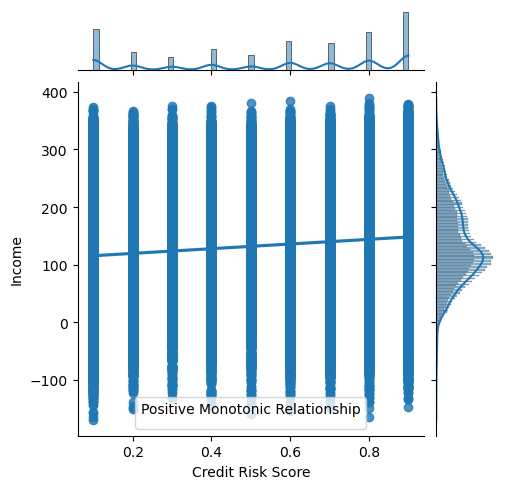

In [32]:
sns.jointplot(x="income", y="credit_risk_score", data=train,  kind='reg', height=5)
plt.xlabel("Credit Risk Score")
plt.ylabel("Income")
plt.legend(title="Positive Monotonic Relationship")
plt.show()

Statistical Testing: These two variables are Continuous vs Continuous, <b>both</b> not normally distributed per the shapiro test.

The Spearman's R was used for a nonparametric test of linearity.

In [9]:
r, p = stats.spearmanr(train.credit_risk_score, train.income)
ex.eval_Spearman(r, p, α=0.05)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.181359
P-value: 0.0


> The P-value gives me no indication as to what direction the relationship goes, but it appears there is a relationship between the two features.

<h3>Is there a relationship between <b>Customer Age</b> and <b>Credit Risk Score</b>?

𝐻0
 : There is no linear correlation between Customer Age and Credit Risk Score.

𝐻𝑎
 : There is a linear correlation between Customer Age and Credit Risk Score.

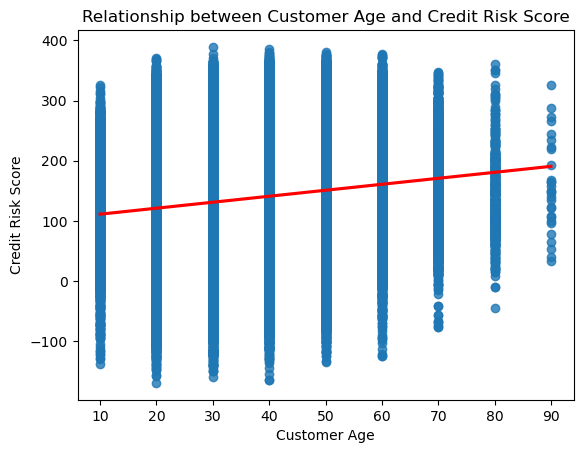

In [10]:
sns.regplot(y = train.credit_risk_score, x = train.customer_age, line_kws={'color':'red'})
plt.xlabel('Customer Age')
plt.ylabel('Credit Risk Score')
plt.title('Relationship between Customer Age and Credit Risk Score')
plt.show()

Statistical Testing: These two variables are Continuous vs Continuous, <b>both</b> not normally distributed per the shapiro test.

The Spearman's R was used for a nonparametric test of linearity.

In [11]:
r, p = stats.spearmanr(train.customer_age, train.credit_risk_score)
ex.eval_Spearman(r, p, α=0.05)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.170769
P-value: 0.0


> I'm unable to see a less condensed version of the P-value, but I'd have to guess it's positive and would match the line of regression shown above that proves as Customer Age increases, so does Credit Risk Score.

<h3>Is there a relationship between <b>Device Distinct Emails 8w</b> and <b>Name Email Similarity</b>?

𝐻0
 : There is no linear correlation between 'Device Distinct Emails 8w' and 'Name Email Similarity'.

𝐻𝑎
 : There is a linear correlation between 'Device Distinct Emails 8w' and 'Name Email Similarity'.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


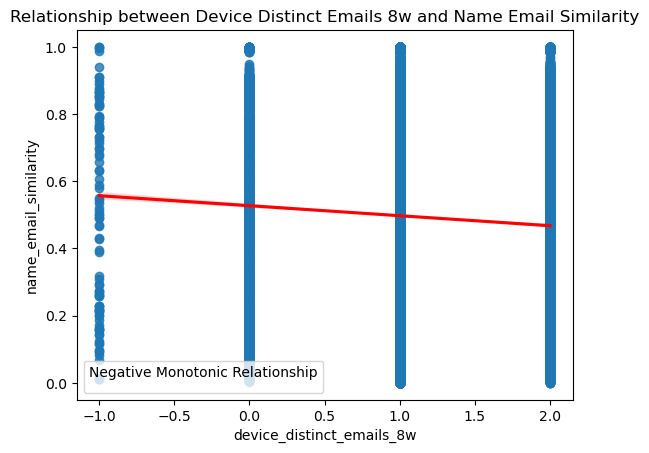

In [33]:
sns.regplot(data = train, x = 'device_distinct_emails_8w', y = 'name_email_similarity', line_kws={'color':'red'})
plt.title('Relationship between Device Distinct Emails 8w and Name Email Similarity')
plt.legend(title="Negative Monotonic Relationship")
plt.show()

Statistical Testing: These two variables are Continuous vs Continuous, <b>both</b> not normally distributed per the shapiro test.

The Spearman's R was used for a nonparametric test of linearity.

In [13]:
r, p = stats.spearmanr(train.device_distinct_emails_8w, train.name_email_similarity)
ex.eval_Spearman(r, p, α=0.05)

We reject H₀, there is a monotonic relationship.
Spearman’s r: -0.018017
P-value: 4.5014474642903214e-30


> The negative P-value in the Spearman's R test conducted seems to match the corresponding regplot, in that negative correlations imply that as x increases, y decreases as shown above. There is a relationship in these two features as hypothesized.

<h3>Is there a relationship between <b>Current Address Months Count</b> and <b>Zip Count 4w</b>?

𝐻0
 : There is no linear correlation between 'Current Address Months Count' and 'Zip Count 4w'.

𝐻𝑎
 : There is a linear correlation between 'Current Address Months Count' and 'Zip Count 4w'.

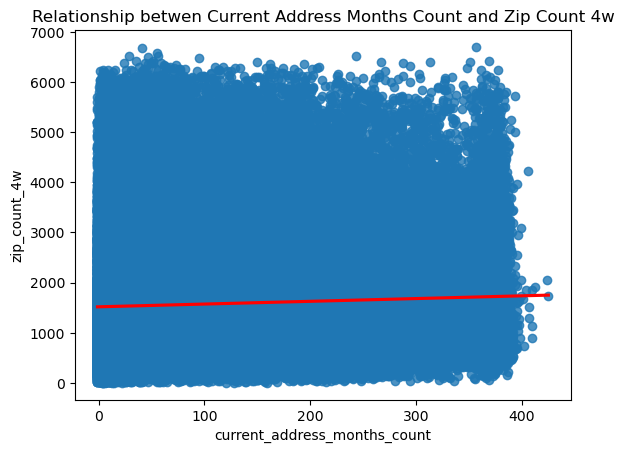

In [14]:
sns.regplot(data = train, x = 'current_address_months_count', y = 'zip_count_4w', line_kws={'color':'red'})
plt.title('Relationship betwen Current Address Months Count and Zip Count 4w')
plt.show()

Statistical Testing: These two variables are Continuous vs Continuous, <b>both</b> not normally distributed per the shapiro test.

The Spearman's R was used for a nonparametric test of linearity.

In [15]:
r, p = stats.spearmanr(train.current_address_months_count, train.zip_count_4w)
ex.eval_Spearman(r, p, α=0.05)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.071054
P-value: 0.0


> The graphic presents a very minor positive regression line within the muddled data shown that seems to match the Spearman's R results of a monotonic relationship present in the two features.

<h2>Explore Summary:
    
<h4>The heatmap provided insight regarding each feature's correlation to the target <b>fraul_bool</b>. I looked at some of the top 10 features and paired them to see if there was linear correlation between them for more insight and found that they all had a monotonic relationship. 
    
    
<h4>I posed five questions post-data exploration to see if the features had relationships to each other. After looking to see if assumptions were met, I conducted statistical testing appropriate for the types of features tested and found a monotonic relationship existed in all pairings. This confirmed my hypothesis and thus, all features will be used in some measure in the near future.</h4>
    
<h4>Moving forward, I will include the top 10, as well as the top 5, for inclusion into my models as I see fit to get the best model for predicting credit card fraud.

<h2>Preprocessing:

In [16]:
train, validate, test = wr.prep_fraud_data(df)
train_scaled, validate_scaled, test_scaled = wr.scale_fraud_data(train, validate, test)
preprocessed_train, preprocessed_validate, preprocessed_test = train_scaled, validate_scaled, test_scaled
X_train, y_train, X_val, y_val, X_test, y_test = ml.break_em_out(preprocessed_train, preprocessed_validate, preprocessed_test)


    train -> (399820, 51)
    validate -> (171352, 51)
    test -> (142794, 51)


<h2>Modeling:

<h4>Originally, I used <b>ALL</b> features in my linear regression modeling, but I then reaccomplished my work selecting only the <b>Top 5</b> features for comparison, all using the following models:

<b>Top 5 Features:</b>
- Customer Age
- Credit Risk Score
- Proposed Credit Limit
- Deviced OS Encoded
- Device OS Windows 
    
<b>Models:</b>
Ordinary Least Squares (OLS)
LassoLars
Generalized Linear Model (GLM)
Polynomial Regression
    
I originally chose to go with linear regression modeling because I thought that I could the number of continuous features available could prove fruitful in determining the best drivers of fraud and making a good model.
    
After certain results, I then expanded my research to determine if logistical regression modeling would prove more useful against a binomial target using:

- Top 5 Features
- Top 10 Features
- All Features


In [17]:
#Establish a Baseline
baseline, baseline_rmse, baseline_r2 = ml.get_baseline(train)


_______________________________________________________________
Baseline: 0.011422640188084638 | Baseline RMSE: 0.10626459184139463 | Baseline r2: 0.0


> <h3>Model 1: Ordinary Least Squares (OLS)

In [18]:
ml.OLS(X_train, y_train, baseline, X_val, y_val)

RMSE for Ordinary Least Squares
_____________________
Training/In-Sample: 0.10438624789996807, 
Validation/Out-of-Sample:  0.1053808392454812
Difference:  0.0009945913455131211
Difference from baseline:  0.09395819905739655
Val r2: 0.03398007955303928


> <h3>Model 2: LassoLars

In [19]:
ml.LassoLars(X_train, y_train, baseline, X_val, y_val)

RMSE for Lasso + Lars
_____________________
Training/In-Sample: 0.10626459184139463, 
Validation/Out-of-Sample:  0.10721842718115214
Difference:  0.0009538353397575139
Difference from baseline:  0.0957957869930675
Val r2: -3.7775445791421447e-06


> <h3>Model 3: Generalized Linear Model (GLM)

In [20]:
ml.GLM(X_train, y_train, baseline, X_val, y_val)

RMSE for GLM
_____________________
Training/In-Sample: 0.10625790684686894, 
Validation/Out-of-Sample:  0.10721174705098374
Difference:  0.0009538402041148059
Difference from baseline:  0.0957891068628991
Val r2: 0.00012082691901005305


> <h3>Model 3: Polynomial Regression

In [21]:
ml.poly_model(X_train, y_train, baseline, X_val, y_val)

RMSE for Polynomial Regression
    _____________________
    Training/In-Sample: 0.1023475313239662, 
    Validation/Out-of-Sample:  48559720.94992026
    Difference:  48559720.84757273
    Difference from baseline:  48559720.93849762
    Val r2: -2.051233690894516e+17


<h3>Best Model on Test Data - OLS Model

In [22]:
ml.OLS_test(X_train, y_train, baseline, X_val, y_val, X_test, y_test)

RMSE & r2 for Ordinary Least Squares Test Model
_____________________________________________
Baseline: 0.011422640188084638
Training/In-Sample: 0.10438624789996807 
Validation/Out-of-Sample:  0.1053808392454812
Test/Out-of-Sample:  0.10531300298951082
Difference from baseline:  0.09389036280142618
Test r2: 0.03531459788548097


<b>OLS Model</b> is the best performing linear regression model with a <b>blistering</b> average model prediction error of 10.5% on unseen data, underperforming the Baseline by 9%.

<h3><b>Logistic Regression

In [23]:
#Establish a baseline
baseline_accuracy = (train.fraud_bool == 0).mean()
round(baseline_accuracy, 4)

0.9886

<b><h4>Model 1 - Top 5 Ranked Features

In [24]:
ml.logit(train, X_train, y_train, validate, X_val, y_val,baseline_accuracy)

Baseline is 0.99
Logistic Regression using Customer Age, Credit Risk Score, Proposed Credit Limit, Deviced OS Encoded and Device OS Windows
Accuracy of Logistic Regression classifier on training set: 0.9886
Logit1 model using Customer Age, Credit Risk Score, Proposed Credit Limit, Deviced OS Encoded and Device OS Windows
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    169359
         1.0       0.00      0.00      0.00      1993

    accuracy                           0.99    171352
   macro avg       0.49      0.50      0.50    171352
weighted avg       0.98      0.99      0.98    171352



<b><h4>Model 2 - Top 10 Ranked Features

In [25]:
ml.logit1(train, X_train, y_train,validate, X_val, y_val, baseline_accuracy)

Logistic Regression using the Top 10 features
Accuracy of Logistic Regression classifier on training set: 0.9886
Logit1 model using using the Top 10 features
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    169359
         1.0       0.00      0.00      0.00      1993

    accuracy                           0.99    171352
   macro avg       0.49      0.50      0.50    171352
weighted avg       0.98      0.99      0.98    171352



<b><h4>Model 3 - All Features

In [26]:
ml.logit2(train, X_train, y_train,validate, X_val, y_val, baseline_accuracy)

Model trained on all features
Accuracy of Logistic Regression classifier on training set: 0.9886
Logit2 model using all features and all model defaults
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    169359
         1.0       0.52      0.01      0.02      1993

    accuracy                           0.99    171352
   macro avg       0.75      0.50      0.51    171352
weighted avg       0.98      0.99      0.98    171352



<b>I'm not sure why there is a difference here compared to my modeling notebook. The code is the same, but there should not be a difference in any of the tests.

<h3>Final Best Model on Test Data - Top 5 Ranked Features

In [29]:
ml.eval_logit_on_Test(train, X_train, y_train, validate, X_val, y_val, test, X_test, y_test, baseline_accuracy)

Logit1 model using Customer Age, Credit Risk Score, Proposed Credit Limit, Deviced OS Encoded and Device OS Windows
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    141133
         1.0       0.00      0.00      0.00      1661

    accuracy                           0.99    142794
   macro avg       0.49      0.50      0.50    142794
weighted avg       0.98      0.99      0.98    142794



<h2>Summary

After acquiring & preparing the data, I conducted uni/bi/multi-variate exploration on the credit card fraud data to look at features and how they might impact the target <b>fraud_bool</b>.

I used a heatmap to look at all possible correlations and ranked correlations to the target.
I made 5 pairs of the top 10 features and conducted statistical testing to observe potential relationships between the features.

The results of my data exploration culminated in me using a diverse combination of features in the modeling phase of this project.

The 
Select K Best Top 5 Features:
Customer_age
Credit_risk_score
Proposed_credit_limit
Device_os_encoded 
Device_os_windows'

I originally chose to go with linear regression modeling due to all of our features being continuous.

I used the following linear regression models:

Ordinary Least Squares (OLS)
LassoLars
Generalized Linear Model (GLM)
Polynomial Regression

I found that our Ordinary Least Squares model was the 'best' performing model, ultimately performing 9% worse than the baseline. 

Upon further research, I then decided to continue further analysis by utilizing <b>logistic</b> regression modeling because my target was binomial and that this method would likely provide better results if I look at 'precision' regarding building a model for predicting fraud.

I conducted three logistic regression models using my ranked features Top 5 for one, Top 10 for the second, and All features for the third. I conducted the tests on train and validate data and found no difference in any of the results when looking for precision.

<h2>Next Steps

The nexts steps would be to look at conducting this entire study from different angles. Incorporating a technique like anomaly detection might better serve me in developing something that better attacks the cause of detecting credit card fraud.

Furthermore, additional study on logistic regression would likely provide me the ability to dig deeper into this research and achieve better results by understanding and using my tools at the mastery level.

<h2>Recommendations

- The data source is extremely unbalanced in regards to the target (1.16% of data is fraudulent, which is what I want to predict). A rebalance should be conducted prior to further study using this data source for better results.

- I would consult other data science studies on credit card fraud to identify if there are commonly discussed features that are not found in this study. It would be important to identify potential blindspots that would improve the precision of the selected model, should the feature be available in our data, but not considered for some reason.